<a href="https://colab.research.google.com/github/Andjelaaaa/dimitrijevic_project/blob/main/PCNToolkitDemo/tutorials/CPC_2020/normative_modelling_walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** DEMO ON NORMATIVE MODELING**


Created by 

Mariam Zabihi [@m_zabihi](https://twitter.com/m_zabihi)

Saige Rutherford [@being_saige](https://twitter.com/being_saige)

Thomas Wolfers [@ThomasWolfers](https://twitter.com/ThomasWolfers)
_______________________________________________________________________________

## **Background Story**

Morten and Ingrid are concerned about the health of their father, Nordan. He recently turned 65 years. A few months ago he could not find his way home. Together, they visit a neurologist/psychiatrist to conduct a number of cognitive tests. However, those tests were inconclusive. While Nordan has a relatively low IQ it could not explain his trouble returning home.

Recently, the family heard about a new screening technique called normative modeling with which one can place individuals in reference to a population norm on for instance measures such as brain volume. Nordan would like to undertake this procedure to better know what is going on and to potentially find targets for treatment. Therefore, the family booked an appointment with you, the normative modeling specialist. To find out what is going on you compare Nordan's hyppocampus to the norm and to a group of persons with Dementia disorders, who have a similar IQ, age as well as the same sex as Nordan.

Do your best to get as far as you can. However, you do not need to feel bad if you cannot complete everything during the tutorial.


## **Task 0:** Load data and install the pcntoolkit

In [1]:
#install normative modeling
! pip uninstall -y Theano-PyMC  # conflicts with Theano on some environments
! pip install pcntoolkit==0.20

Found existing installation: Theano-PyMC 1.1.2
Uninstalling Theano-PyMC-1.1.2:
  Successfully uninstalled Theano-PyMC-1.1.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 164 kB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 1.9 MB 48.3 MB/s 
     |████████████████████████████████| 2.8 MB 41.2 MB/s 
     |████████████████████████████████| 1.5 MB 50.2 MB/s 
     |████████████████████████████████| 570 kB 46.8 MB/s 
     |████████████████████████████████| 3.1 MB 48.1 MB/s 
     |████████████████████████████████| 90 kB 10.8 MB/s 
     |████████████████████████████████| 100 kB 10.0 MB/s 
     |████████████████████████████████| 121 kB 53.5 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
  Created wheel for pcntoolkit: filename=pcntoolkit-0.20-py3-none-any.whl size=72145 sha256=57bcd19fa9c4831720a12857e85ad020e1b4b2da7b18c3b17f1dda

**Option 1:** Connect your Google Drive account, and load data from Google Drive. Having Google Drive connected will allow you to save any files created back to your Drive folder. This step will require you to download the csv files from [Github](https://github.com/predictive-clinical-neuroscience/PCNtoolkit-demo/tree/main/data) to your computer, and then make a folder in your Google Drive account and upload the csv files to this folder. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#change dir to data on your google drive
import os
os.chdir('drive/My Drive/name-of-folder-where-you-uploaded-csv-files-from-Github/') #Change this path to match the path to your data in Google Drive

# code by T. Wolfers

**Option 2:** Import the files directly from Github, and skip adding them to Google Drive.

In [2]:
!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/PCNtoolkit-demo/master/tutorials/CPC_2020/data/camcan_demographics.csv
!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/PCNtoolkit-demo/master/tutorials/CPC_2020/data/camcan_demographics_nordan.csv
!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/PCNtoolkit-demo/master/tutorials/CPC_2020/data/camcan_features.csv
!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/PCNtoolkit-demo/master/tutorials/CPC_2020/data/camcan_features_nordan.csv
    
# code by S. Rutherford

--2022-07-21 14:03:53--  https://raw.githubusercontent.com/predictive-clinical-neuroscience/PCNtoolkit-demo/master/tutorials/CPC_2020/data/camcan_demographics.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17484 (17K) [text/plain]
Saving to: ‘camcan_demographics.csv’

camcan_demographics 100%[===================>]  17.07K  --.-KB/s    in 0.001s  

2022-07-21 14:03:53 (25.5 MB/s) - ‘camcan_demographics.csv’ saved [17484/17484]

--2022-07-21 14:03:53--  https://raw.githubusercontent.com/predictive-clinical-neuroscience/PCNtoolkit-demo/master/tutorials/CPC_2020/data/camcan_demographics_nordan.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com 

## **TASK 1:** Format input data

You have four files. The features and demographics file for the normsample and two files of the same name for Nordan your test sample. As one of your coworkers has done the preporcessing and quality control there are more subjects in the demographics file than in the features file of the norm sample. Please select the overlap of participants between those two files. 


*Question for your understanding:*

1) Why do we have to select the overlap between participants in terms of featrues and demographics?

In [3]:
import pandas as pd

# read in the files.
norm_demographics = pd.read_csv('camcan_demographics.csv',
                                sep= ",",
                                index_col = 0)
norm_features = pd.read_csv('camcan_features.csv',
                            sep=",",
                            index_col = 0)

# check columns through print [there are other better options]
print(norm_demographics)
print(norm_features)

# find overlap in terms of participants between norm_sample_features and 
# norm_sample_demographics

norm_demographics_features = pd.concat([norm_demographics, norm_features],
                                       axis = 1,
                                       join = 'inner') # inner checks overlap
                                                       # outer combines
print(norm_demographics_features)

# code by T. Wolfers

             age sex_name  sex  IQ_random
paricipants                              
CC110033      24     MALE    1         73
CC110037      18     MALE    1        103
CC110045      24   FEMALE    0        124
CC110056      22   FEMALE    0        124
CC110062      20     MALE    1        126
...          ...      ...  ...        ...
CC722542      79     MALE    1        116
CC722651      79   FEMALE    0        128
CC722891      84   FEMALE    0        129
CC723197      80   FEMALE    0         96
CC723395      86   FEMALE    0        145

[707 rows x 4 columns]
              left_Hippocampal_tail  left_subiculum    left_CA1  \
participants                                                      
CC110033                 482.768229      419.948094  666.496024   
CC110037                 595.269259      502.320315  698.157779   
CC110045                 655.847194      476.433625  654.215689   
CC110056                 561.345626      447.258970  611.114561   
CC110062                 756

## **TASK 2:** Prepare the covariate_normsample and testresponse_normsample file. 

As mentioned in the introductory presentation those files need a specific format and the entries need to be seperated by spaces. Use whatever method you know to prepare those files based on the data provided in TASK 1. Save those files in .txt format in your drive. Also get rid of the column names and participant IDs.

Given that we only have limited time in this practical we have to make a selection for the features based on your prior knowledge. With the information in mind that Nordan does not remember his way home, which subfield of the hyppocampus is probably a good target for the investigations?
Select a maximum of four hyppocampal regions as features.

NOTE: Normative modeling is a screening tool we just make this selection due to time constraints, in reality we build these models on millions of putative biomarkers that are not restricted to brain imaging.


*Qestions for your understanding:*

2) What is the requirement for the features in terms of variable properties (e.g. dicotomous or continous)? 3) What is the requirement for the covariates in terms of these properties? 4) What are the requirements for both together? 5) How does this depent on the algorithm used?

In [4]:
# prepare covariate_normsample for sex and age
covariate_normsample = norm_demographics_features[['sex',
                                                   'age']] 

covariate_normsample.to_csv('covariate_normsample.txt',
                            sep = ' ',
                            header = False, 
                            index = False)

# perpare features_normsample for relevant hyppocampal subfields
features_normsample = norm_demographics_features[['left_CA1', 
                                                 'left_CA3',
                                                 'right_CA1',
                                                 'right_CA3']]

features_normsample.to_csv('features_normsample.txt', 
                           sep = ' ', 
                           header = False, 
                           index = False)

# code by T. Wolfers

## **TASK 3:** Estimate normative model


Once you have prepared and saved all the necessary files. Look at the pcntoolkit for running normative modeling. Select an appropritate method set up the toolkit and run your analyses using 2-fold cross validation in the normsample. Change the output suffix from estimate to '_2fold'. 

HINT: You primarily need the estimate function. 

SUGGESTION: While this process is running you can go to the next TASK 4, you will have no doubt when it is correctly running.

*Question for your understaning:*

6) What does cvfolds mean and why do we use it? 7) What is the output of the estimate function and what does it mean?

In [5]:
import pcntoolkit as pcn

# run normative modeling using 2-fold cross-validation

pcn.normative.estimate(covfile = 'covariate_normsample.txt', 
                       respfile = 'features_normsample.txt',
                       cvfolds = 2,
                       alg = 'gpr',
                       outputsuffix = '_2fold')

# code by T. Wolfers

Processing data in features_normsample.txt
Estimating model  1 of 4
Optimization terminated successfully.
         Current function value: 1859.987364
         Iterations: 49
         Function evaluations: 113
         Gradient evaluations: 113
Estimating model  2 of 4
Optimization terminated successfully.
         Current function value: 1610.244598
         Iterations: 30
         Function evaluations: 80
         Gradient evaluations: 80
Estimating model  3 of 4
Optimization terminated successfully.
         Current function value: 1872.171792
         Iterations: 32
         Function evaluations: 76
         Gradient evaluations: 69
Estimating model  4 of 4
Optimization terminated successfully.
         Current function value: 1596.755905
         Iterations: 45
         Function evaluations: 103
         Gradient evaluations: 103
Estimating model  1 of 4
Optimization terminated successfully.
         Current function value: 1913.957086
         Iterations: 28
         Function eva

## Notes on the previous cell of code
* This code ran for 44 seconds

## **TASK 4:** Estimate the forward model of the normative model


In order to visulize the normative trajectories you first need to run the forward model. To this end you need to set up an appropriate covariate_forwardmodel file that covers the age range appropriately for both sexes. Save this file as .txt . Then you can input the files you made in TASK 1 as well as the file you made now and run the forward model using the appropriate specifications.

*Question for your understaning:*

8) What is yhat and ys2? 9) Why does the output of the forward model does not inlcude the Z-scores?

In [6]:
# create covariate_forwardmodel.txt file
covariate_forwardmodel = {'sex': [0, 0, 0, 0, 0, 0, 0,
                                  1, 1, 1, 1, 1, 1, 1],
                          'age': [20, 30, 40, 50, 60, 70, 80,
                                  20, 30, 40, 50, 60, 70, 80]}
covariate_forwardmodel = pd.DataFrame(data=covariate_forwardmodel)

covariate_forwardmodel.to_csv('covariate_forwardmodel.txt', 
                           sep = ' ', 
                           header = False, 
                           index = False)

# estimate forward model
pcn.normative.estimate(covfile = 'covariate_normsample.txt', 
                       respfile = 'features_normsample.txt',
                       testcov = 'covariate_forwardmodel.txt',
                       cvfolds = None,
                       alg = 'gpr',
                       outputsuffix = '_forward')

# code by T. Wolfers

Processing data in features_normsample.txt
Estimating model  1 of 4
Optimization terminated successfully.
         Current function value: 3781.497401
         Iterations: 20
         Function evaluations: 60
         Gradient evaluations: 53
Estimating model  2 of 4
Optimization terminated successfully.
         Current function value: 3201.761309
         Iterations: 39
         Function evaluations: 108
         Gradient evaluations: 108
Estimating model  3 of 4
Optimization terminated successfully.
         Current function value: 3771.310488
         Iterations: 47
         Function evaluations: 153
         Gradient evaluations: 139
Estimating model  4 of 4
Optimization terminated successfully.
         Current function value: 3200.837262
         Iterations: 40
         Function evaluations: 104
         Gradient evaluations: 104
Writing outputs ...


In [7]:
covariate_forwardmodel

,sex,age
0,0,20
1,0,30
2,0,40
3,0,50
4,0,60
5,0,70
6,0,80
7,1,20
8,1,30
9,1,40


## Notes on the previous cell of code
* It ran for 1 minute and 40 seconds

## **TASK 5:** Visualize forward model

Visualize the forward model of the normative model similar to the figure below.

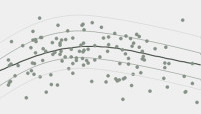

HINT: First create a function that calculates the confidence intervals and then plot yhat, y2 of the forward model. Finally, plot the data of individual participants.

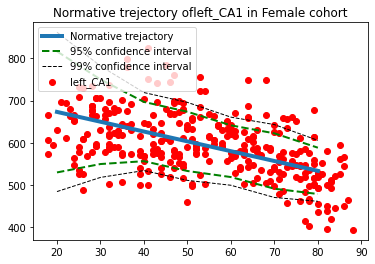

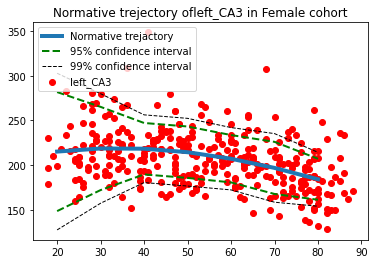

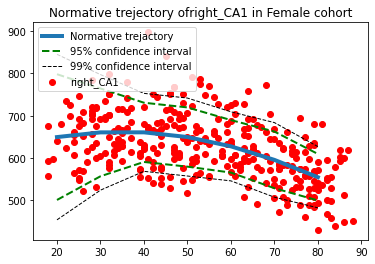

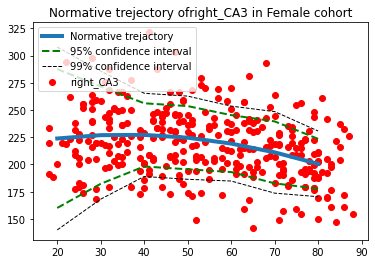

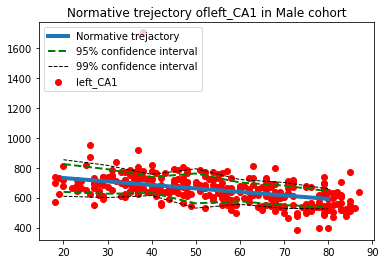

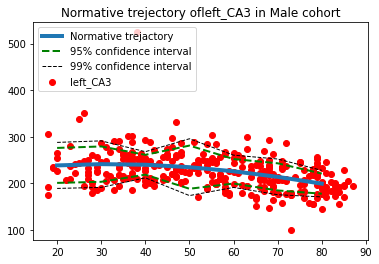

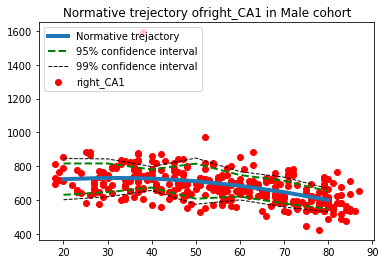

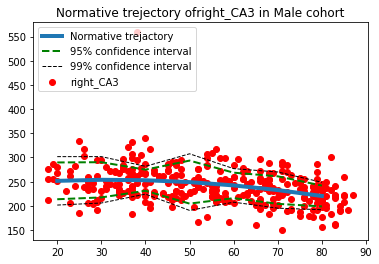

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# confidence interval calculation at x_forward
def confidence_interval(s2,x,z):
  CI=np.zeros((len(x_forward),4))
  for i,xdot in enumerate(x_forward):
    ci_inx=np.isin(x,xdot)
    S2=s2[ci_inx]
    S_hat=np.mean(S2,axis=0)
    n=S2.shape[0]
    CI[i,:]=z*np.power(S_hat/n,.5)
  return CI 


feature_names=['left_CA1','left_CA3','right_CA1','right_CA3']
sex_covariates=[ 'Female','Male']
# Creating plots for Female and male 
for i,sex in enumerate(sex_covariates):
#forward model data
    forward_yhat = pd.read_csv('yhat_forward.txt', sep = ' ', header=None)
    yhat_forward=forward_yhat.values
    yhat_forward=yhat_forward[7*i:7*(i+1)]
    x_forward=[20, 30, 40, 50, 60, 70, 80]

# Find the index of the data exclusively for one sex. Female:0, Male: 1   
    inx=np.where(covariate_normsample.sex==i)[0]
    x=covariate_normsample.values[inx,1]
# actual data
    y = pd.read_csv('features_normsample.txt', sep = ' ', header=None)
    y=y.values[inx]
# confidence Interval yhat+ z *(std/n^.5)-->.95 % CI:z=1.96, 99% CI:z=2.58 
    s2= pd.read_csv('ys2_2fold.txt', sep = ' ', header=None)
    s2=s2.values[inx]

    CI_95=confidence_interval(s2,x,1.96)
    CI_99=confidence_interval(s2,x,2.58)

# Creat a trejactroy for each point     
    for j,name in enumerate(feature_names):
         fig=plt.figure()
         ax=fig.add_subplot(111)
         ax.plot(x_forward,yhat_forward[:,j], linewidth=4, label='Normative trejactory')


         ax.plot(x_forward,CI_95[:,j]+yhat_forward[:,j], linewidth=2,linestyle='--',c='g', label='95% confidence interval')  
         ax.plot(x_forward,-CI_95[:,j]+yhat_forward[:,j], linewidth=2,linestyle='--',c='g') 

         ax.plot(x_forward,CI_99[:,j]+yhat_forward[:,j], linewidth=1,linestyle='--',c='k', label='99% confidence interval')  
         ax.plot(x_forward,-CI_99[:,j]+yhat_forward[:,j], linewidth=1,linestyle='--',c='k') 

         ax.scatter(x,y[:,j],c='r', label=name)
         plt.legend(loc='upper left')
         plt.title('Normative trejectory of' +name+' in '+sex+' cohort')
         plt.show()
         plt.close()
        
# code by M. Zabihi

## **TASK 6:** Apply the normative model to Nordan's data and the dementia patients.

In [9]:
# read in Nordan's as well as the patient's demographics and features
demographics_nordan = pd.read_csv('camcan_demographics_nordan.csv',
                                       sep= ",",
                                       index_col = 0)
features_nordan = pd.read_csv('camcan_features_nordan.csv',
                            sep=",",
                            index_col = 0)

# create a covariate file for Nordan's as well as the patient's demograhpics
covariate_nordan = demographics_nordan[['sex',
                                        'age']] 
covariate_nordan.to_csv('covariate_nordan.txt',
                        sep = ' ',
                        header = False, 
                        index = False)

# create the corresponding feature file
features_nordan = features_nordan[['left_CA1', 
                                  'left_CA3',
                                  'right_CA1',
                                  'right_CA3']]

features_nordan.to_csv('features_nordan.txt', 
                        sep = ' ', 
                        header = False, 
                        index = False)

# apply normative modeling
pcn.normative.estimate(covfile = 'covariate_normsample.txt', 
                       respfile = 'features_normsample.txt',
                       testcov = 'covariate_nordan.txt',
                       testresp = 'features_nordan.txt',
                       cvfolds = None,
                       alg = 'gpr',
                       outputsuffix = '_nordan')

# code by T. Wolfers

Processing data in features_normsample.txt
Estimating model  1 of 4
Optimization terminated successfully.
         Current function value: 3781.497401
         Iterations: 20
         Function evaluations: 60
         Gradient evaluations: 53
Estimating model  2 of 4
Optimization terminated successfully.
         Current function value: 3201.761309
         Iterations: 39
         Function evaluations: 108
         Gradient evaluations: 108
Estimating model  3 of 4
Optimization terminated successfully.
         Current function value: 3771.310488
         Iterations: 47
         Function evaluations: 153
         Gradient evaluations: 139
Estimating model  4 of 4
Optimization terminated successfully.
         Current function value: 3200.837262
         Iterations: 40
         Function evaluations: 104
         Gradient evaluations: 104
Evaluating the model ...
Writing outputs ...


## Notes on the code cell above
* It ran for 1 minute and 39 seconds

## **TASK 7:** In which hyppocampal subfield(s) does Nordan deviate extremely? 


No coding necessary just create a presentation which includes recommendations to Nordan and his family. 
Use i) |Z| > 3.6 ii) |Z| > 1.96 as definitions for extreme normative deviations.

## **TASK 8 (OPTIONAL):** Implement a function that calculates percentage change. 

Percentage change = $\frac{x1 - x2}{|x2|}*100$

In [10]:
# function that calculates percentage change
def calculate_percentage_change(x1, x2):
  percentage_change = ((x1 - x2) / abs(x2)) * 100
  return percentage_change

# code by T. Wolfers

## **TASK 9 (OPTIONAL):** Visualize percent change





Plot the prercentage change in Yhat of the forward model in reference to age 20. Do that for both sexes seperately.

(-20.0, 2.0)

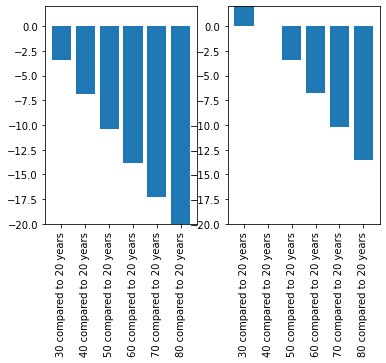

In [11]:
import matplotlib.pyplot as plt

forward_yhat = pd.read_csv('yhat_forward.txt', sep = ' ', header=None)

# You can indicate here which hypocampal subfield you like to visualize
hyppocampal_subfield = 0

percentage_change_female = []
percentage_change_male = []
count = 0
lengths = len(forward_yhat[hyppocampal_subfield])
for entry in forward_yhat[hyppocampal_subfield]:
  if count > 0 and count < 7:
    loop_percentage_change_female = calculate_percentage_change(entry, 
                                                                forward_yhat.iloc[0,
                                                                                  hyppocampal_subfield])
    percentage_change_female.append(loop_percentage_change_female)
  elif count > 7: 
    loop_percentage_change_male = calculate_percentage_change(entry,
                                                              forward_yhat.iloc[9,
                                                                                hyppocampal_subfield])
    percentage_change_male.append(loop_percentage_change_male)
  count = count + 1 

names = ['30 compared to 20 years', 
         '40 compared to 20 years', 
         '50 compared to 20 years', 
         '60 compared to 20 years', 
         '70 compared to 20 years',
         '80 compared to 20 years']

# females
plt.subplot(121)
plt.bar(names, percentage_change_female)
plt.xticks(rotation=90)
plt.ylim(-20, 2)

# males
plt.subplot(122)
plt.bar(names, percentage_change_male)
plt.xticks(rotation=90)
plt.ylim(-20, 2)

# code by T. Wolfers